In [265]:
! pip install --quiet colored

# Importing and Data Loading
Not using Plotly for this dataset, since it weirdly keeps crashing the notebook. It would be great if anyone can give some potential reasons as to why this is happening.

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch.autograd import Variable
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import joblib
from colored import fore, style
plt.style.use('fivethirtyeight')

In [261]:
data = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Observations from the dataset

* Students in this dataset had a minimum chance of **34%** and a maximum of **97%** of getting selected
* *75%* of students had less than **82%** chances of getting selected.  
* *50%* of students in the data had less than **72%** chances of getting selected.
* On an average a student had **8.5** GPA (out of a maximum 10). In this, 75% of all students have less than 9.0 GPA and 50% of the students have less than 8.5 GPA.
* Also, the minimum present GPA present is **6.8** and the maximum present is **9.9**
* SOP, LOR and University Rating Descriptives are fairly straight forward and you can take a look at them yourself below
* Maximum TOEFL Score is **120** and minimum is **92**. Of this, 75% of all students have less than 112 score in TOEFL and 50% of the students have less than 107 score. On an average the student has 107 score.
* Maximum GRE Score is **340** and minimum is **290**. Of this, 75% of all students have less than 325 score in GRE and 50% of the students have less than 317 score. On an average the student has 316 score.

In [263]:
# Look at the descriptive statistics of the data
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [264]:
# Drop useless column for further visualization and also check for any null values
data = data.drop(['Serial No.'], axis=1)
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

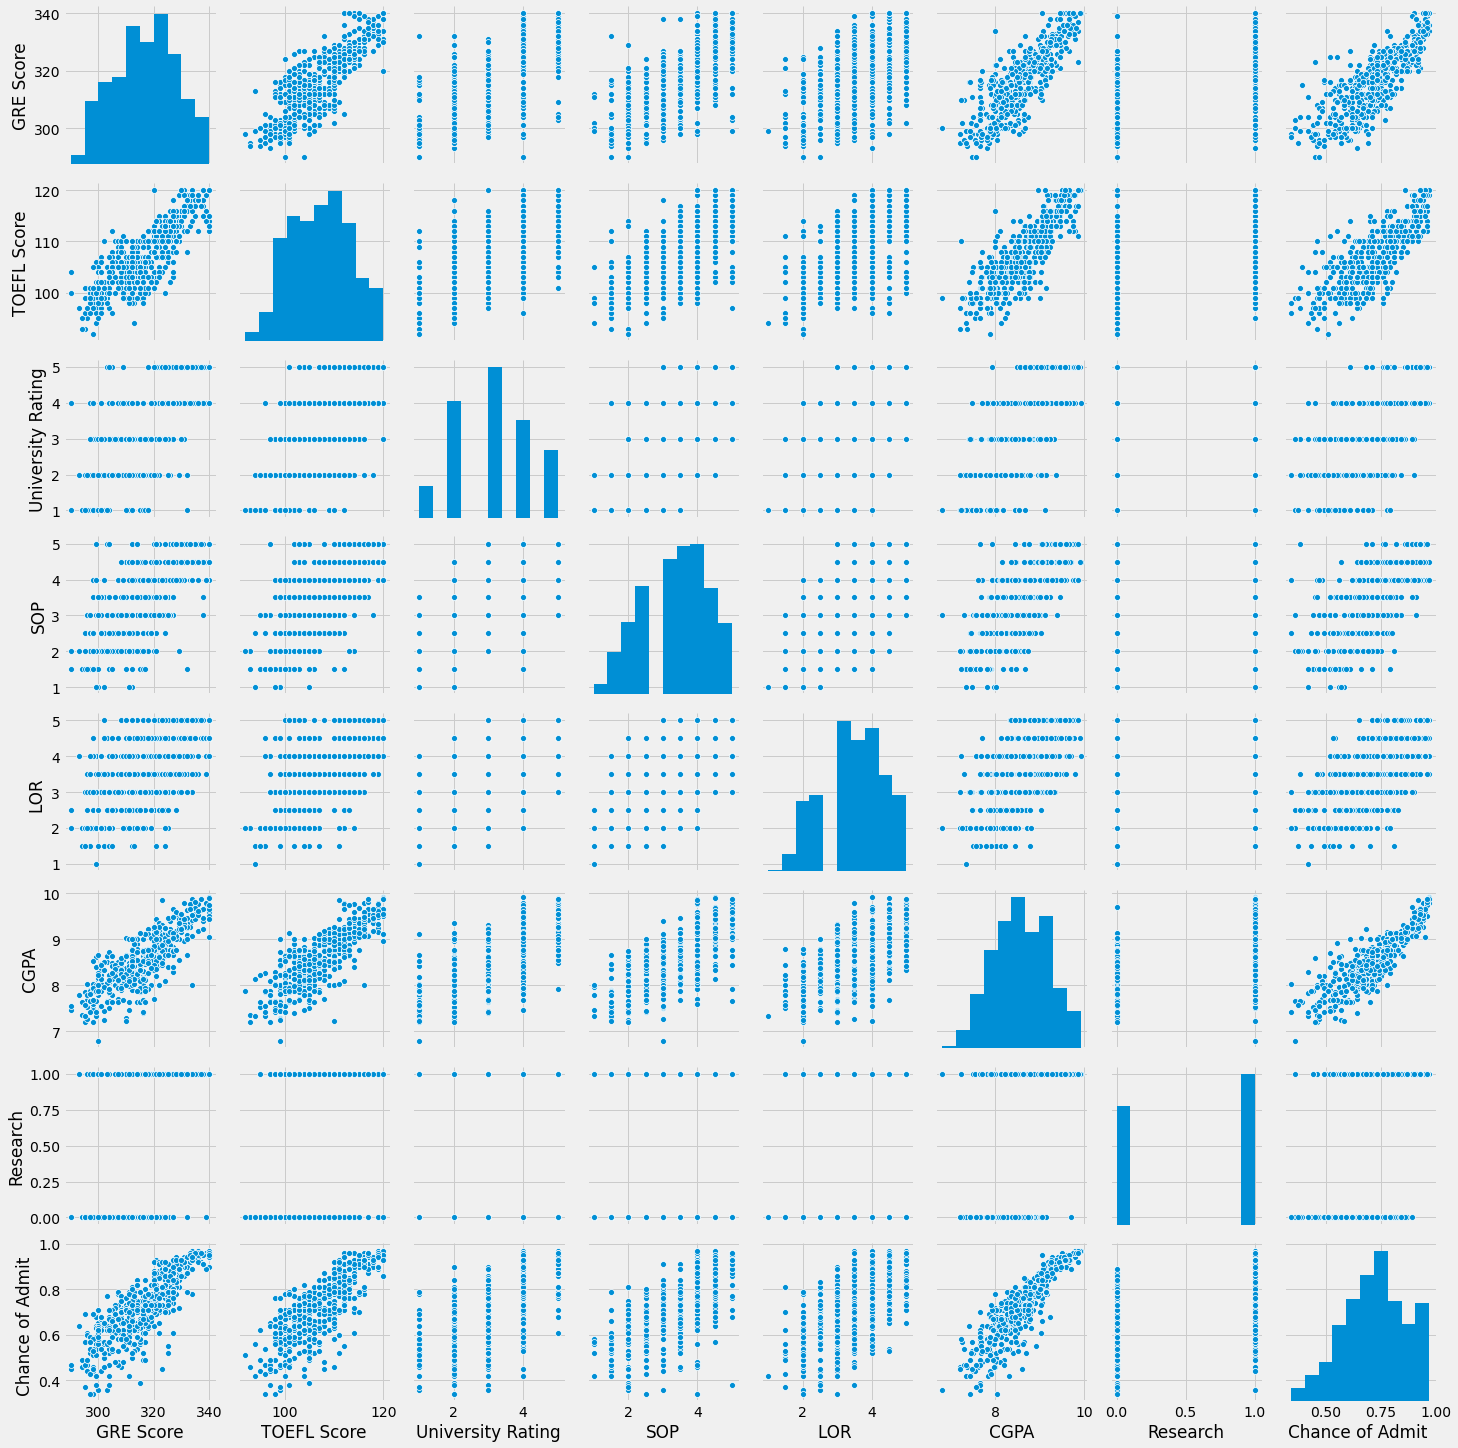

In [131]:
# A pairplot visualizes how each variable depends on other variables (If you have no idea what that is, pick a stats book for god's sake)
sns.pairplot(data)

Correlation in a nutshell: 
More Correlation between 2 features => More closely they affect each other and vice-versa


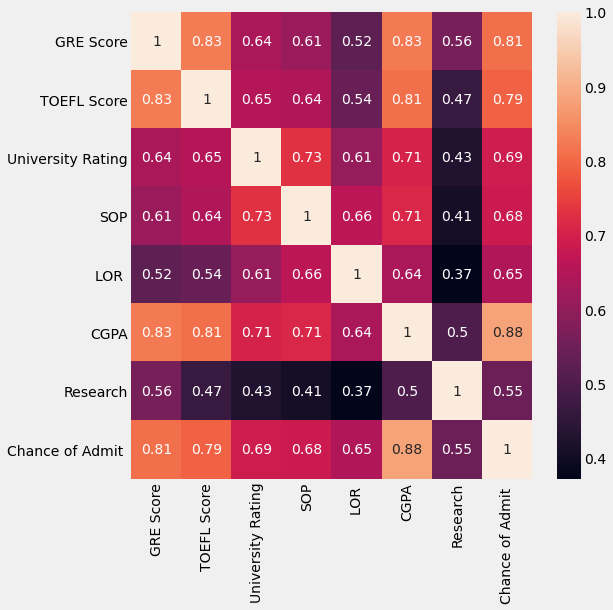

In [282]:
# This is a heatmap.
# It shows the correlation between different variables at play
fig = plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True)
fig.show()
print("Correlation in a nutshell: ")
print(fore.GREEN+"More Correlation between 2 features => More closely they affect each other and vice-versa"+style.RESET)

In [272]:
feature_importance = dict(data.corr()['Chance of Admit '])
sort_orders = sorted(feature_importance.items(), key=lambda x: x[1])
sort_orders.pop()

print(fore.GREEN+f"Most Important feature for getting selected is: {sort_orders[-1][0]}"+style.RESET)
print(fore.RED+f"Least Important feature for getting selected is: {sort_orders[0][0]}"+style.RESET)

Most Important feature for getting selected is: CGPA
Least Important feature for getting selected is: Research


In [277]:
# Order of Most Important to Least Important Features
print("Following are the features from most important to least important (Darker Blue Shade = More Important) and (Lesser Blue Shade = Less Important)")
i=len(sort_orders)-1
colors = [fore.BLUE_VIOLET, fore.VIOLET, fore.BLUE, fore.GREEN, fore.YELLOW, fore.ORANGE_1, fore.RED][::-1]
while i>=0:
    print(colors[i]+f"{sort_orders[i][0]}"+style.RESET)
    i-=1

Following are the features from most important to least important (Darker Blue Shade = More Important) and (Lesser Blue Shade = Less Important)
CGPA
GRE Score
TOEFL Score
University Rating
SOP
LOR 
Research


In [145]:
# Split the data
X = data.drop('Chance of Admit ', axis=1).values
y = data['Chance of Admit '].values
# Just taking 5% of the total data for validation
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.05)

# Training a Model

I have tried training the model using different libraries and here is what I observed;

1. PyTorch: Made a Custom Linear Regression model and got ~91% accuracy on test set
2. Scikit-learn: Just used the pre-built `LogisticRegression` class and got ~92% accuracy on test set

Conclusion: You can use both, however for much bigger and diverse datasets, I would rather use the pre-built Logistic Regression model from scikit-learn as it is more efficient and does steps such as Data Normalization and better weights initialization.

In [224]:
# Define a linear regression model
class LinearRegressionTorch(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [225]:
# And Hyperparamters
inp_dim = 7
op_dim = 1
learningRate = 0.001
epochs = 15000

In [226]:
# See if CUDA is available
model = LinearRegressionTorch(inp_dim, op_dim)
try:
    model.cuda()
except AssertionError:
    print("GPU isn't enabled")

GPU isn't enabled


In [227]:
# Define the loss and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

In [228]:
# Reshape the labels
y_train = y_train.reshape(-1, 1)
y_val = y_val.reshape(-1, 1)

In [229]:
verbose=True
all_loss = []
for epoch in range(epochs+1):
    
    # Convert the data into torch tensors
    inputs = Variable(torch.from_numpy(x_train)).float()
    label = Variable(torch.from_numpy(y_train)).float()
    
    # Clear the existing Gradients from the optimizer
    optimizer.zero_grad()
    
    # Pass the data thorugh model and get one set of predictions
    output = model(inputs)
    
    # Calculate the loss from the obtained predictions and the ground truth values
    loss = torch.sqrt(criterion(output, label))
    
    # Calculate gradients by doing one step of back propagation
    loss.backward()
    
    # Apply those gradients to the weights by doing one step of optimizer
    optimizer.step()
    
    # Add the current loss to the list of all loses (used later for prediction)
    all_loss.append(loss)
    
    # For monitoring and debugging
    if verbose and epoch % 1000 == 0:
        print(f"Epoch: {epoch}  |  Loss: {loss}")

Epoch: 0  |  Loss: 16.733795166015625
Epoch: 1000  |  Loss: 0.15610583126544952
Epoch: 2000  |  Loss: 0.09224051982164383
Epoch: 3000  |  Loss: 0.07344737648963928
Epoch: 4000  |  Loss: 0.0682467371225357
Epoch: 5000  |  Loss: 0.06664831191301346
Epoch: 6000  |  Loss: 0.06591203063726425
Epoch: 7000  |  Loss: 0.0654013603925705
Epoch: 8000  |  Loss: 0.06497465074062347
Epoch: 9000  |  Loss: 0.06459826976060867
Epoch: 10000  |  Loss: 0.06426194310188293
Epoch: 11000  |  Loss: 0.06396090239286423
Epoch: 12000  |  Loss: 0.06369055062532425
Epoch: 13000  |  Loss: 0.06344866752624512
Epoch: 14000  |  Loss: 0.0632319226861
Epoch: 15000  |  Loss: 0.0630379468202591


In [236]:
# Test the model and compute Validation Accuracy
VAL_inp = Variable(torch.from_numpy(x_val)).float()

y_pred = model(VAL_inp).detach().numpy()

# Calculate R^2 Accuracy (used for regression where discrete values are absent)
rss = sum((y_val - y_pred)**2)       # Residual Sum of Squares
tss = sum((y_val - y_val.mean())**2) # Total Sum of Squares

r2_accuracy = (1 - rss / tss)
print(f"Validation Accuracy of the model is: {r2_accuracy.squeeze() * 100} %")

Validation Accuracy of the model is: 91.43330939436709 %


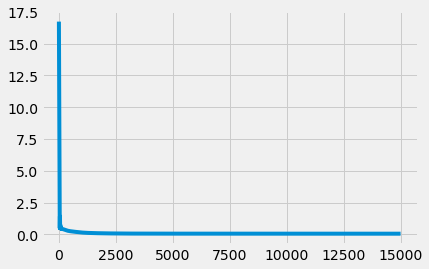

In [232]:
plt.plot(all_loss)

In [237]:
# Let's now use sklearn's Linear Regression Model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [238]:
# Measure the model accuracy (the same R^2 Accuracy) using score method
model.score(x_val, y_val)

0.9187732068085193

In [240]:
# Save the sklearn model
joblib.dump(model, "sklearn_model_college_adm.sav")

['sklearn_model_college_adm.sav']